In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("strategy_returns.csv",index_col = 0)

In [7]:
df.head()

,Strategy_A,Strategy_B,Strategy_C,Strategy_D,Strategy_E
Date,,,,,
2020-01-01,0.546714,1.709227,-0.500143,-2.801711,-0.843494
2020-01-02,-0.088264,1.139560,-0.075615,-1.230578,-0.011203
2020-01-03,0.697689,0.101556,-0.593936,-0.560408,0.038017
2020-01-04,1.573030,-0.746324,-0.206369,2.891531,0.492630
2020-01-05,-0.184153,0.867868,-1.474892,0.894830,-1.346858


In [8]:
strategy_names = df.columns.tolist()

In [9]:
print("Strategy Names:", strategy_names)

Strategy Names: ['Strategy_A', 'Strategy_B', 'Strategy_C', 'Strategy_D', 'Strategy_E']


In [11]:
strategy_A_returns = df['Strategy_A']
print("\nStrategy_A Returns Preview:")
print(strategy_A_returns.head())


Strategy_A Returns Preview:
Date
2020-01-01    0.546714
2020-01-02   -0.088264
2020-01-03    0.697689
2020-01-04    1.573030
2020-01-05   -0.184153
Name: Strategy_A, dtype: float64


In [12]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
            Strategy_A  Strategy_B  Strategy_C  Strategy_D  Strategy_E
Strategy_A    1.000000   -0.040400    0.022129   -0.013321   -0.031237
Strategy_B   -0.040400    1.000000   -0.011199   -0.054698   -0.018687
Strategy_C    0.022129   -0.011199    1.000000    0.021586    0.036015
Strategy_D   -0.013321   -0.054698    0.021586    1.000000    0.019204
Strategy_E   -0.031237   -0.018687    0.036015    0.019204    1.000000


In [20]:
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) use k=1 to include diagnol
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

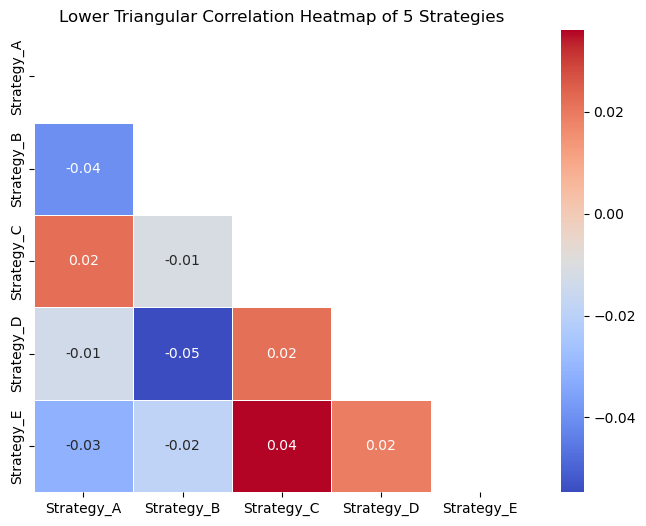

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lower Triangular Correlation Heatmap of 5 Strategies")
plt.show()

In [49]:
new_strategy_df = pd.read_csv("new_strategy_returns.csv",
                                  index_col=0)

In [50]:
new_strategy_name = new_strategy_df.columns.tolist()

In [51]:
combined_df = pd.concat(
            [df, new_strategy_df],
            axis=0).dropna()

In [52]:
new_strategy_df.head()

,New_Strategy
Day,
1,0.004967
2,-0.001383
3,0.006477
4,0.015230
5,-0.002342


In [53]:
df = df.reset_index(drop=True).iloc[:1000]
new_strategy_df = new_strategy_df.reset_index(drop=True).iloc[:1000]

In [54]:
df.head()

,Strategy_A,Strategy_B,Strategy_C,Strategy_D,Strategy_E
0,0.546714,1.709227,-0.500143,-2.801711,-0.843494
1,-0.088264,1.139560,-0.075615,-1.230578,-0.011203
2,0.697689,0.101556,-0.593936,-0.560408,0.038017
3,1.573030,-0.746324,-0.206369,2.891531,0.492630
4,-0.184153,0.867868,-1.474892,0.894830,-1.346858


In [55]:
new_strategy_df.head()

,New_Strategy
0,0.004967
1,-0.001383
2,0.006477
3,0.015230
4,-0.002342


In [56]:
combined_df = pd.concat([df, new_strategy_df], axis=1)

In [57]:
combined_df.head()

,Strategy_A,Strategy_B,Strategy_C,Strategy_D,Strategy_E,New_Strategy
0,0.546714,1.709227,-0.500143,-2.801711,-0.843494,0.004967
1,-0.088264,1.139560,-0.075615,-1.230578,-0.011203,-0.001383
2,0.697689,0.101556,-0.593936,-0.560408,0.038017,0.006477
3,1.573030,-0.746324,-0.206369,2.891531,0.492630,0.015230
4,-0.184153,0.867868,-1.474892,0.894830,-1.346858,-0.002342


In [58]:
new_correlation_matrix = combined_df.corr()
new_corr_values = new_correlation_matrix.loc[new_strategy_name, :]
new_corr_matrix = pd.DataFrame(new_corr_values).T

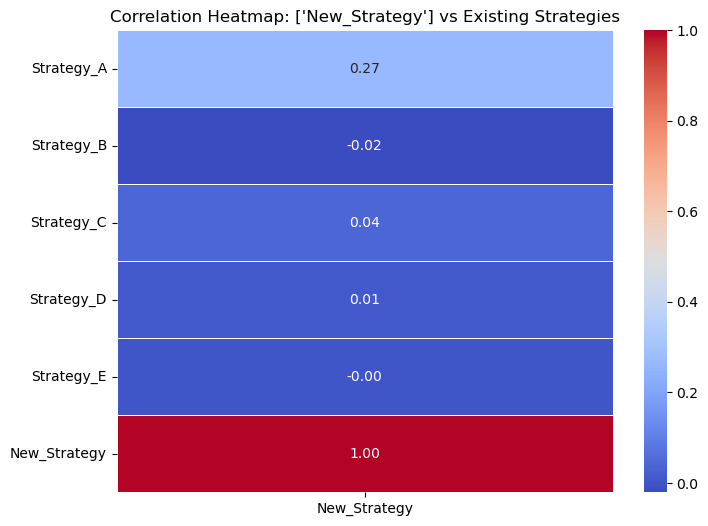

In [59]:
if new_corr_matrix.shape[0] == 1:
    mask = None
else:
    mask = np.triu(np.ones_like(new_corr_matrix, dtype=bool), k=1)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(new_corr_matrix,
                mask=mask,
                annot=True,
                cmap="coolwarm",
                fmt=".2f",
                linewidths=0.5)
    plt.title(f"Correlation Heatmap: {new_strategy_name} vs Existing Strategies")
